In [73]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit.circuit.library import C3XGate
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.quantum_info import Statevector, DensityMatrix

qreg_q = QuantumRegister(7, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

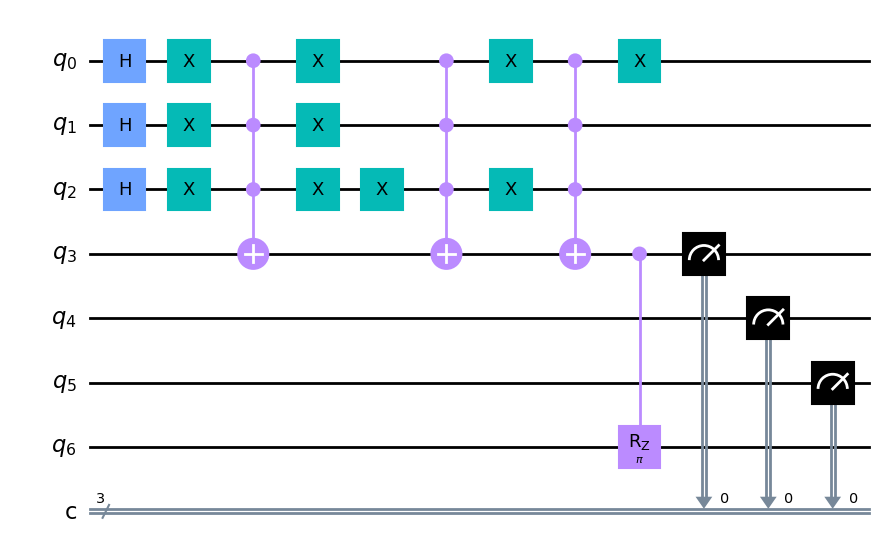

In [74]:
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])

circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])

circuit.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])

circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])


circuit.x(qreg_q[2])
circuit.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
circuit.x(qreg_q[2])

circuit.x(qreg_q[0])
circuit.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
circuit.x(qreg_q[0])

circuit.crz(pi, qreg_q[3],qreg_q[6])

circuit.measure(qreg_q[3],creg_c[0])
circuit.measure(qreg_q[4],creg_c[0])
circuit.measure(qreg_q[5],creg_c[0])


circuit.draw(output="mpl")

In [75]:
simulator = QasmSimulator()

compiled_circuit = transpile(circuit,simulator)

job = simulator.run(compiled_circuit, shots=1000)

result = job.result()

counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'000': 1000}


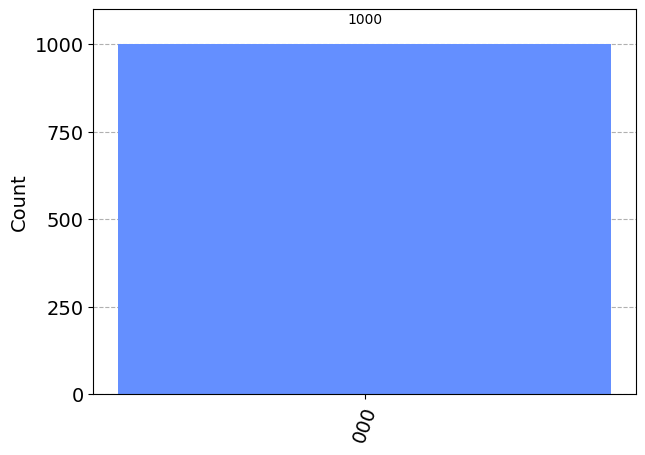

In [76]:
plot_histogram(counts)